In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_excel('d:\\work\\python\\jupyter\\data\\gratings.xlsx')

In [2]:
df

,scan,height(nm),period(mkm),expose(nm),batch
0,test001_283,415.38,4.625,2250.0,eb-19bn-005m-4_5b
1,test001_284,424.12,4.563,2000.0,eb-19bn-005m-4_5b
2,test001_285,348.02,4.063,2000.0,eb-19bn-005m-4_5b
3,test001_286,396.12,4.063,1875.0,eb-19bn-005m-4_5b
4,test001_287,425.59,4.438,1938.0,eb-19bn-005m-4_5b
...,...,...,...,...,...
1963,image-n.321,492.71,1.125,500.0,proba-fgt
1964,image-n.322,443.26,1.125,437.0,proba-fgt
1965,image-n.323,512.47,1.188,500.0,proba-fgt
1966,image-n.324,424.77,1.063,500.0,proba-fgt


In [3]:
glass_01_ni_01 = df[df['batch'].isin(['glass-01', 'ni-01', 'ni-m-01'])]
glass_01_ni_01

,scan,height(nm),period(mkm),expose(nm),batch
1149,sample728,514.17,6.688,3313.0,glass-01
1150,sample729,494.25,6.875,3250.0,glass-01
1151,sample730,515.15,6.250,3000.0,glass-01
1152,sample731,510.68,6.250,2875.0,glass-01
1153,sample732,517.88,6.813,3250.0,glass-01
...,...,...,...,...,...
1801,image-n.083,502.46,5.125,2188.0,ni-m-01
1802,image-n.084,493.93,5.750,2500.0,ni-m-01
1803,image-n.085,504.36,5.563,2625.0,ni-m-01
1804,image-n.086,500.34,5.063,2438.0,ni-m-01


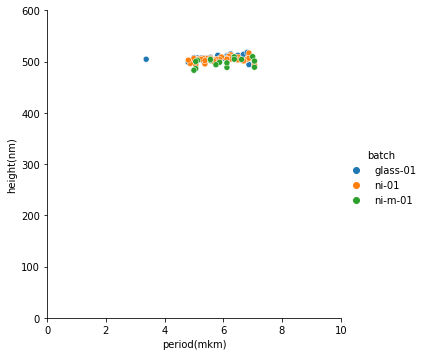

In [4]:
plot = sns.relplot(x="period(mkm)", y="height(nm)", hue='batch', data=glass_01_ni_01)
plot.set(xlim=(0, 10))
plot.set(ylim=(0, 600))

In [5]:
glass_01 = df[df['batch'].isin(['glass-01'])]
glass_01 = glass_01.reset_index(drop=True)

ni_01 = df[df['batch'].isin(['ni-01'])]
ni_01 = ni_01.drop(axis=0, index=1526).reset_index(drop=True)  # it's actually a dupe sample from glass-01 dataset

glass_01.head()

,scan,height(nm),period(mkm),expose(nm),batch
0,sample728,514.17,6.688,3313.0,glass-01
1,sample729,494.25,6.875,3250.0,glass-01
2,sample730,515.15,6.250,3000.0,glass-01
3,sample731,510.68,6.250,2875.0,glass-01
4,sample732,517.88,6.813,3250.0,glass-01


In [6]:
glass_01_batch = glass_01['batch'][0]
glass_01.columns = [f'{glass_01_batch}_{col}' for col in glass_01.columns]

ni_01_batch = ni_01['batch'][0]
ni_01.columns = [f'{ni_01_batch}_{col}' for col in ni_01.columns]


In [7]:
glass_ni_result = pd.merge(glass_01, ni_01, left_index=True, right_index=True)  # use rsuffix and lsuffix
glass_ni_result

,glass-01_scan,glass-01_height(nm),glass-01_period(mkm),glass-01_expose(nm),glass-01_batch,ni-01_scan,ni-01_height(nm),ni-01_period(mkm),ni-01_expose(nm),ni-01_batch
0,sample728,514.17,6.688,3313.0,glass-01,test001.235,511.53,6.875,3.375,ni-01
1,sample729,494.25,6.875,3250.0,glass-01,test001.236,494.00,7.063,3.375,ni-01
2,sample730,515.15,6.250,3000.0,glass-01,test001.237,513.19,6.250,3.000,ni-01
3,sample731,510.68,6.250,2875.0,glass-01,test001.238,508.76,6.250,2.875,ni-01
4,sample732,517.88,6.813,3250.0,glass-01,test001.239,516.76,6.875,3.250,ni-01
5,sample733,504.40,6.813,3313.0,glass-01,test001.240,504.99,6.813,3.375,ni-01
6,sample734,511.51,6.125,2875.0,glass-01,test001.241,510.27,6.188,2.875,ni-01
7,sample735,507.43,6.250,2750.0,glass-01,test001.242,505.07,6.250,2.875,ni-01
8,sample736,508.51,6.875,3375.0,glass-01,test001.243,506.70,6.875,3.375,ni-01
9,sample737,512.27,6.500,3063.0,glass-01,test001.244,508.87,6.500,3.063,ni-01


In [8]:
design_01 = pd.read_excel('D:\work\python\grating_measure\processed\!mod\design-01.xlsx', engine='openpyxl')
design_01 = design_01.dropna().reset_index(drop=True)
design_01.head()

,index,loc,angle(deg),period(mkm),expose(nm),batch,file
0,1,#01,90,6.0,3000,design-01,sample728
1,2,#02,45,6.0,3000,design-01,sample729
2,3,#03,90,5.5,2700,design-01,sample730
3,4,#04,45,5.5,2700,design-01,sample731
4,5,#05,90,6.0,3000,design-01,sample732


In [9]:
design_glass_ni_result = pd.merge(glass_ni_result, design_01, left_index=True, right_index=True)  # use rsuffix and lsuffix
design_glass_ni_result.head()


,glass-01_scan,glass-01_height(nm),glass-01_period(mkm),glass-01_expose(nm),glass-01_batch,ni-01_scan,ni-01_height(nm),ni-01_period(mkm),ni-01_expose(nm),ni-01_batch,index,loc,angle(deg),period(mkm),expose(nm),batch,file
0,sample728,514.17,6.688,3313.0,glass-01,test001.235,511.53,6.875,3.375,ni-01,1,#01,90,6.0,3000,design-01,sample728
1,sample729,494.25,6.875,3250.0,glass-01,test001.236,494.00,7.063,3.375,ni-01,2,#02,45,6.0,3000,design-01,sample729
2,sample730,515.15,6.250,3000.0,glass-01,test001.237,513.19,6.250,3.000,ni-01,3,#03,90,5.5,2700,design-01,sample730
3,sample731,510.68,6.250,2875.0,glass-01,test001.238,508.76,6.250,2.875,ni-01,4,#04,45,5.5,2700,design-01,sample731
4,sample732,517.88,6.813,3250.0,glass-01,test001.239,516.76,6.875,3.250,ni-01,5,#05,90,6.0,3000,design-01,sample732


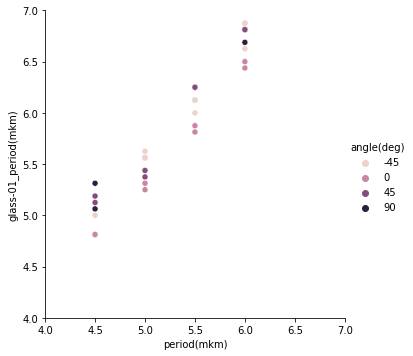

In [18]:
plot = sns.relplot(x="period(mkm)", y="glass-01_period(mkm)", hue='angle(deg)', data=design_glass_ni_result)
plot.set(xlim=(4, 7))
plot.set(ylim=(4, 7))